In [119]:
import torch 
from torch.utils.data import DataLoader
from torchvision import datasets,io,transforms
from torchvision.models.mobilenetv3 import *
from torchvision.models import MobileNet_V3_Small_Weights
from torch import nn
import timeit

In [102]:
#device agnostic code
device='cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [103]:
#Data Transform
data_tr=transforms.Compose([transforms.Resize(size=(224,224)),transforms.ToTensor()])

In [104]:
#Creating Dataset
train_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Train data',transform=data_tr)
test_data=datasets.ImageFolder(root=r'C:\Users\Sudip\Desktop\New folder\Data\Test data',transform=data_tr)
Classes=train_data.classes
Classes

['Bandhani', 'Ilkal', 'Kasavu', 'Sambalpuri']

torch.Size([3, 224, 224])

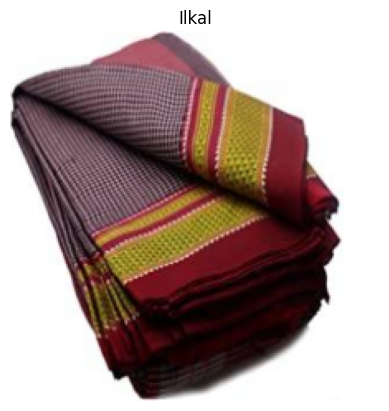

In [105]:
#Viewing the data
import matplotlib.pyplot as plt
import random
N=random.randint(0,500)
plt.imshow(train_data[N][0].permute(1,2,0))
plt.title(f"{Classes[train_data[N][1]]}")
plt.axis(False)
train_data[N][0].shape

In [106]:
#Creating dataloader
Batch_size=32
Train_dataloader=DataLoader(train_data,Batch_size,shuffle=True)
Test_dataloader=DataLoader(test_data,Batch_size,shuffle=True)

In [152]:
#Using MobileNetv3
model_0=mobilenet_v3_small(weights=None).to(device)

In [144]:
#loss function & optimiser
loss_fn=torch.nn.CrossEntropyLoss()
optim=torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [146]:
#Training and Testing
NUM_EPOCHS=1
st=timeit.default_timer()
for epoch in range(NUM_EPOCHS):
    #turning on training mode
    train_loss,train_acc,test_loss,test_acc,=0,0,0,0
    model_0.train()
    for batch, (X,y) in enumerate(Train_dataloader):
        X,y=X.to(device),y.to(device)
        y_=model_0(X)
        loss=loss_fn(y_,y)
        train_loss += loss.item()
        optim.zero_grad()
        loss.backward()
        optim.step()
        y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_)
    #turing on testing mode
    model_0.eval()
    with torch.inference_mode():
        for batch, (X,y) in enumerate(Test_dataloader):
            X,y=X.to(device),y.to(device)
            y_=model_0(X)
            loss=loss_fn(y_,y)
            test_loss += loss.item()
            y_pred_class = torch.argmax(torch.softmax(y_, dim=1), dim=1)
            test_acc += (y_pred_class == y).sum().item()/len(y_)
    train_loss,train_acc,test_loss,test_acc,=train_loss/len(Train_dataloader),train_acc/len(Train_dataloader),test_loss/len(Test_dataloader),test_acc/len(Test_dataloader)
    print(f"Epoch:{epoch}| Train accuracy:{train_acc}|Train loss:{train_loss}|Test acc:{test_acc}|Test loss:{test_loss}")
ed=timeit.default_timer()
print(f"Total time:{(ed-st)}")

Epoch:0| Train accuracy:0.7673022598870057|Train loss:0.9594598694120423|Test acc:0.5080357142857143|Test loss:2.1489392518997192
Total time:30.055196900008013
